In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv("C:\\projects\\mlproject\\notebook\\data\\StudentsPerformance.csv")

In [39]:
df.head

<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none      

In [40]:
df = pd.DataFrame(df)

In [41]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.shape

(1000, 8)

In [43]:
#check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [44]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [45]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [46]:
#checking the number of unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [47]:
#check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [48]:
#define the numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [49]:
print("We have {} numerical features:{}".format(len(numerical_features),numerical_features))
print("\n We have {} categorical features:{}".format(len(categorical_features),categorical_features))

We have 3 numerical features:['math score', 'reading score', 'writing score']

 We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [50]:
df["total_score"] = df["math score"] + df["reading score"] +df["writing score"]
df["Average"] = df["total_score"]/3

In [51]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [52]:
math_full = df[df["math score"] == 100]["math score"].count()
writing_full = df[df["writing score"] == 100]["writing score"].count()
reading_full = df[df["reading score"] == 100]["reading score"].count()

In [53]:
print(f"The number of students with full marks in Math:{math_full}")
print(f"The number of students with full marks in reading:{reading_full}")
print(f"The number of students with full marks in writing:{writing_full}")


The number of students with full marks in Math:7
The number of students with full marks in reading:17
The number of students with full marks in writing:14


In [54]:
math_less_30 = df[df["math score"] <= 30]["math score"].count()
reading_less_30 = df[df["reading score"] <= 30]["reading score"].count()
writing_less_30 = df[df["writing score"] <= 30]["writing score"].count()

In [55]:
print(f"Number of students with less than 30 marks in math {math_less_30} ")
print(f"Number of students with less than 30 marks in reading {reading_less_30} ")
print(f"Number of students with less than 30 marks in writing {writing_less_30} ")

Number of students with less than 30 marks in math 16 
Number of students with less than 30 marks in reading 8 
Number of students with less than 30 marks in writing 10 


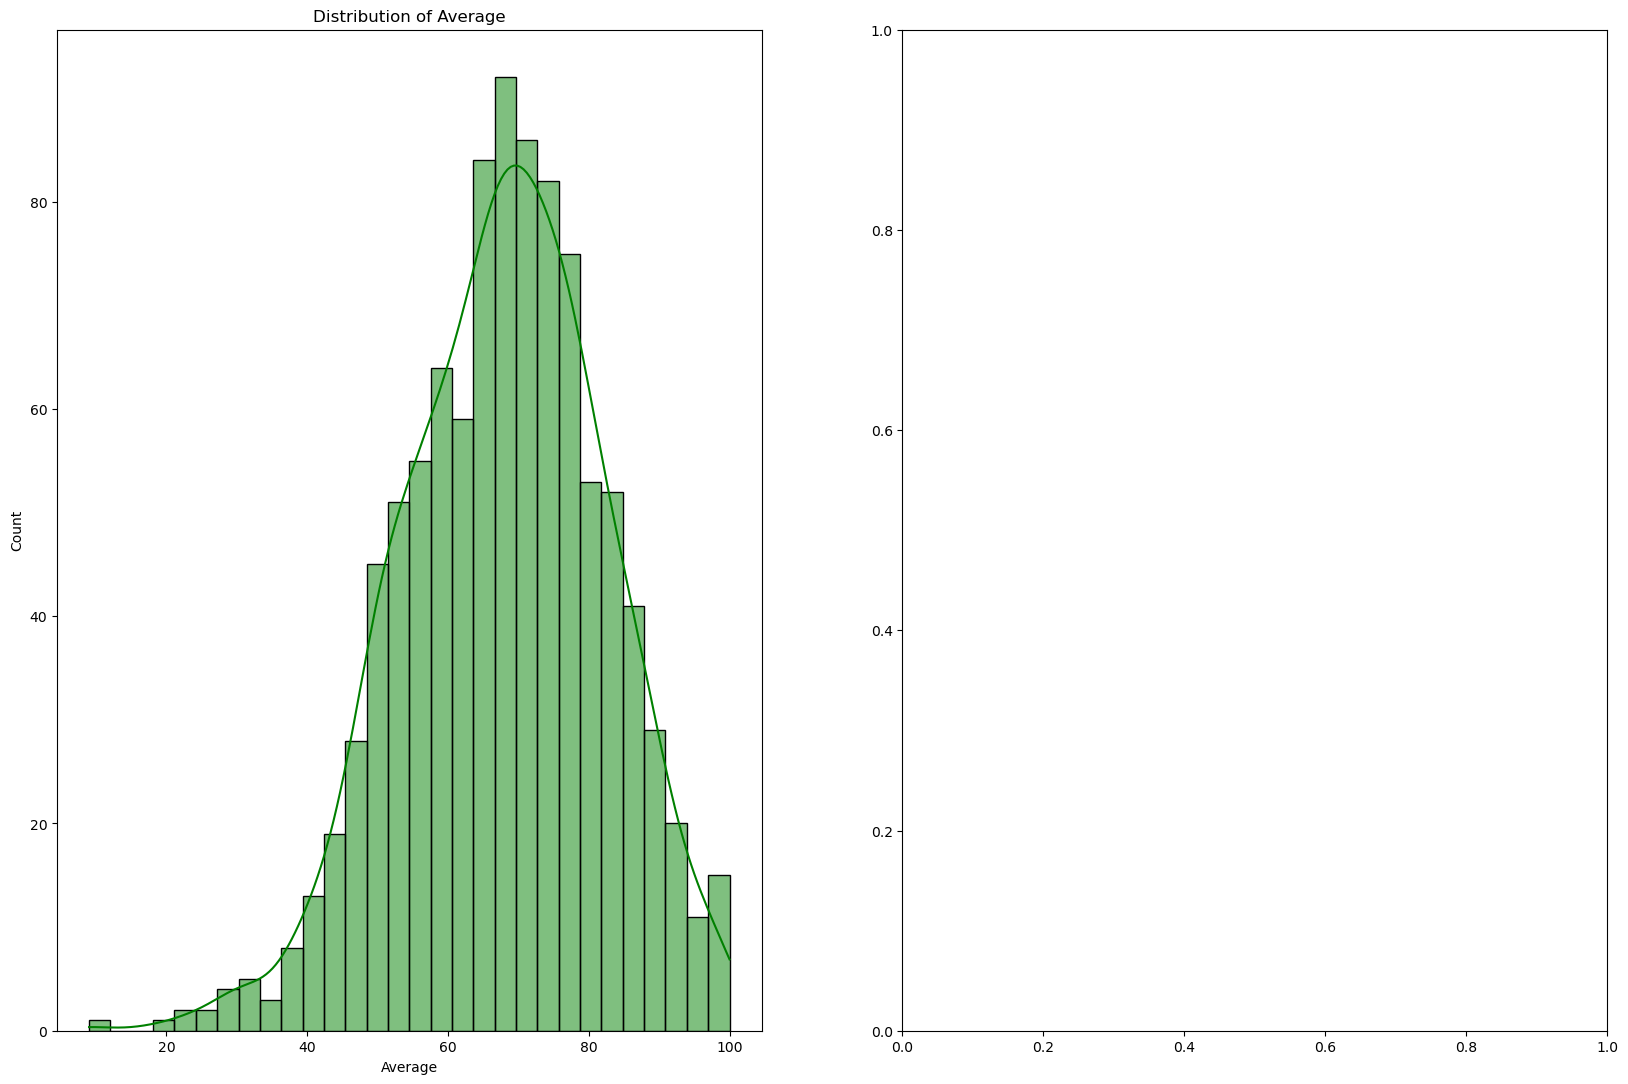

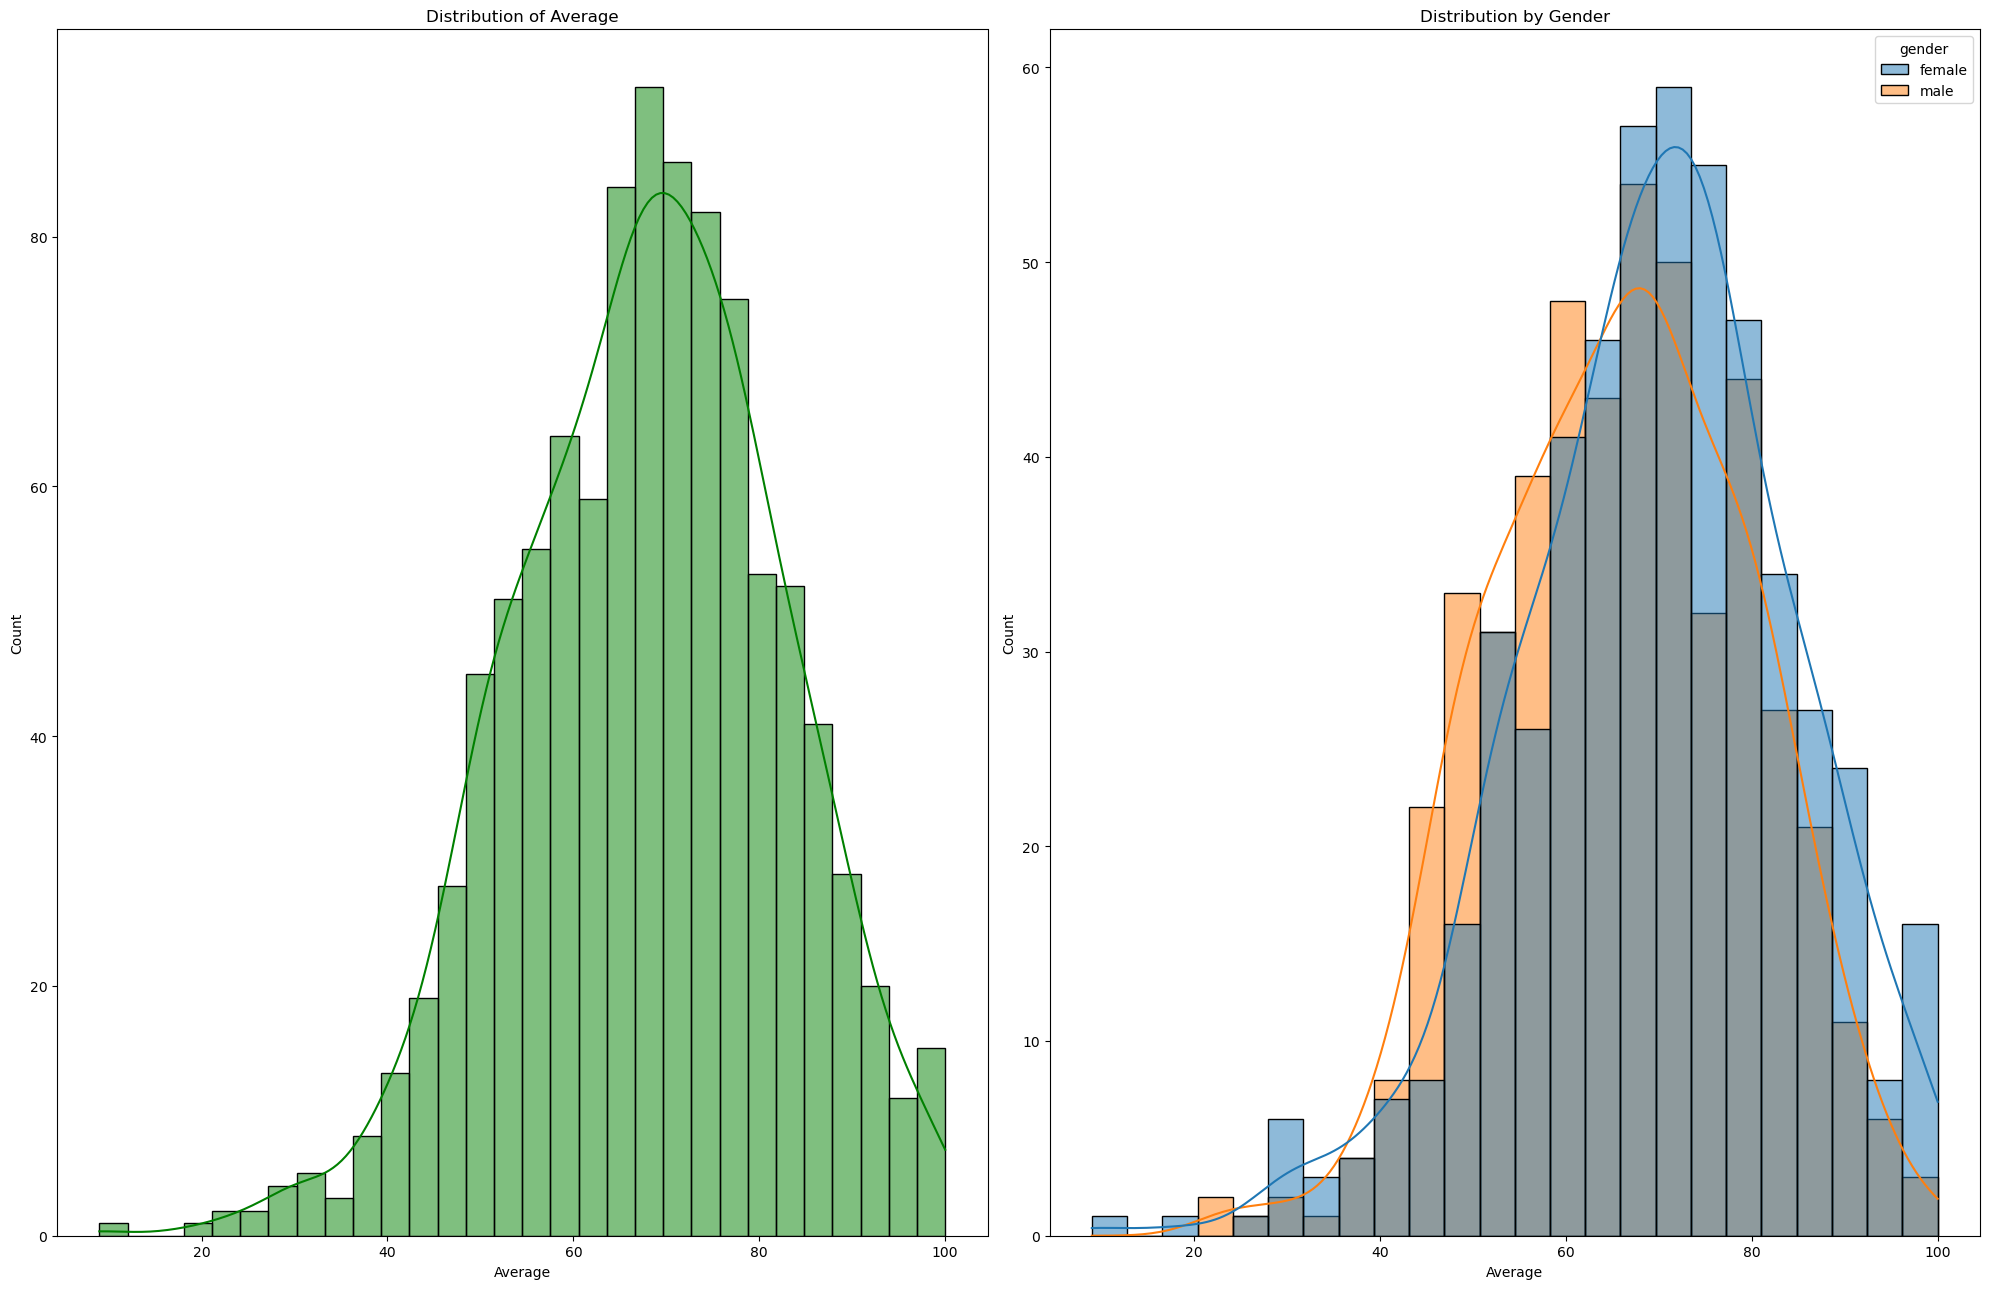

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 13))  # 1 row, 2 columns

# First subplot
sns.histplot(data=df, x="Average", bins=30, kde=True, color="g", ax=axs[0])
axs[0].set_title("Distribution of Average")

# Second subplot
sns.histplot(data=df, x="Average", kde=True, hue="gender", ax=axs[1])
axs[1].set_title("Distribution by Gender")

plt.tight_layout()
plt.show()


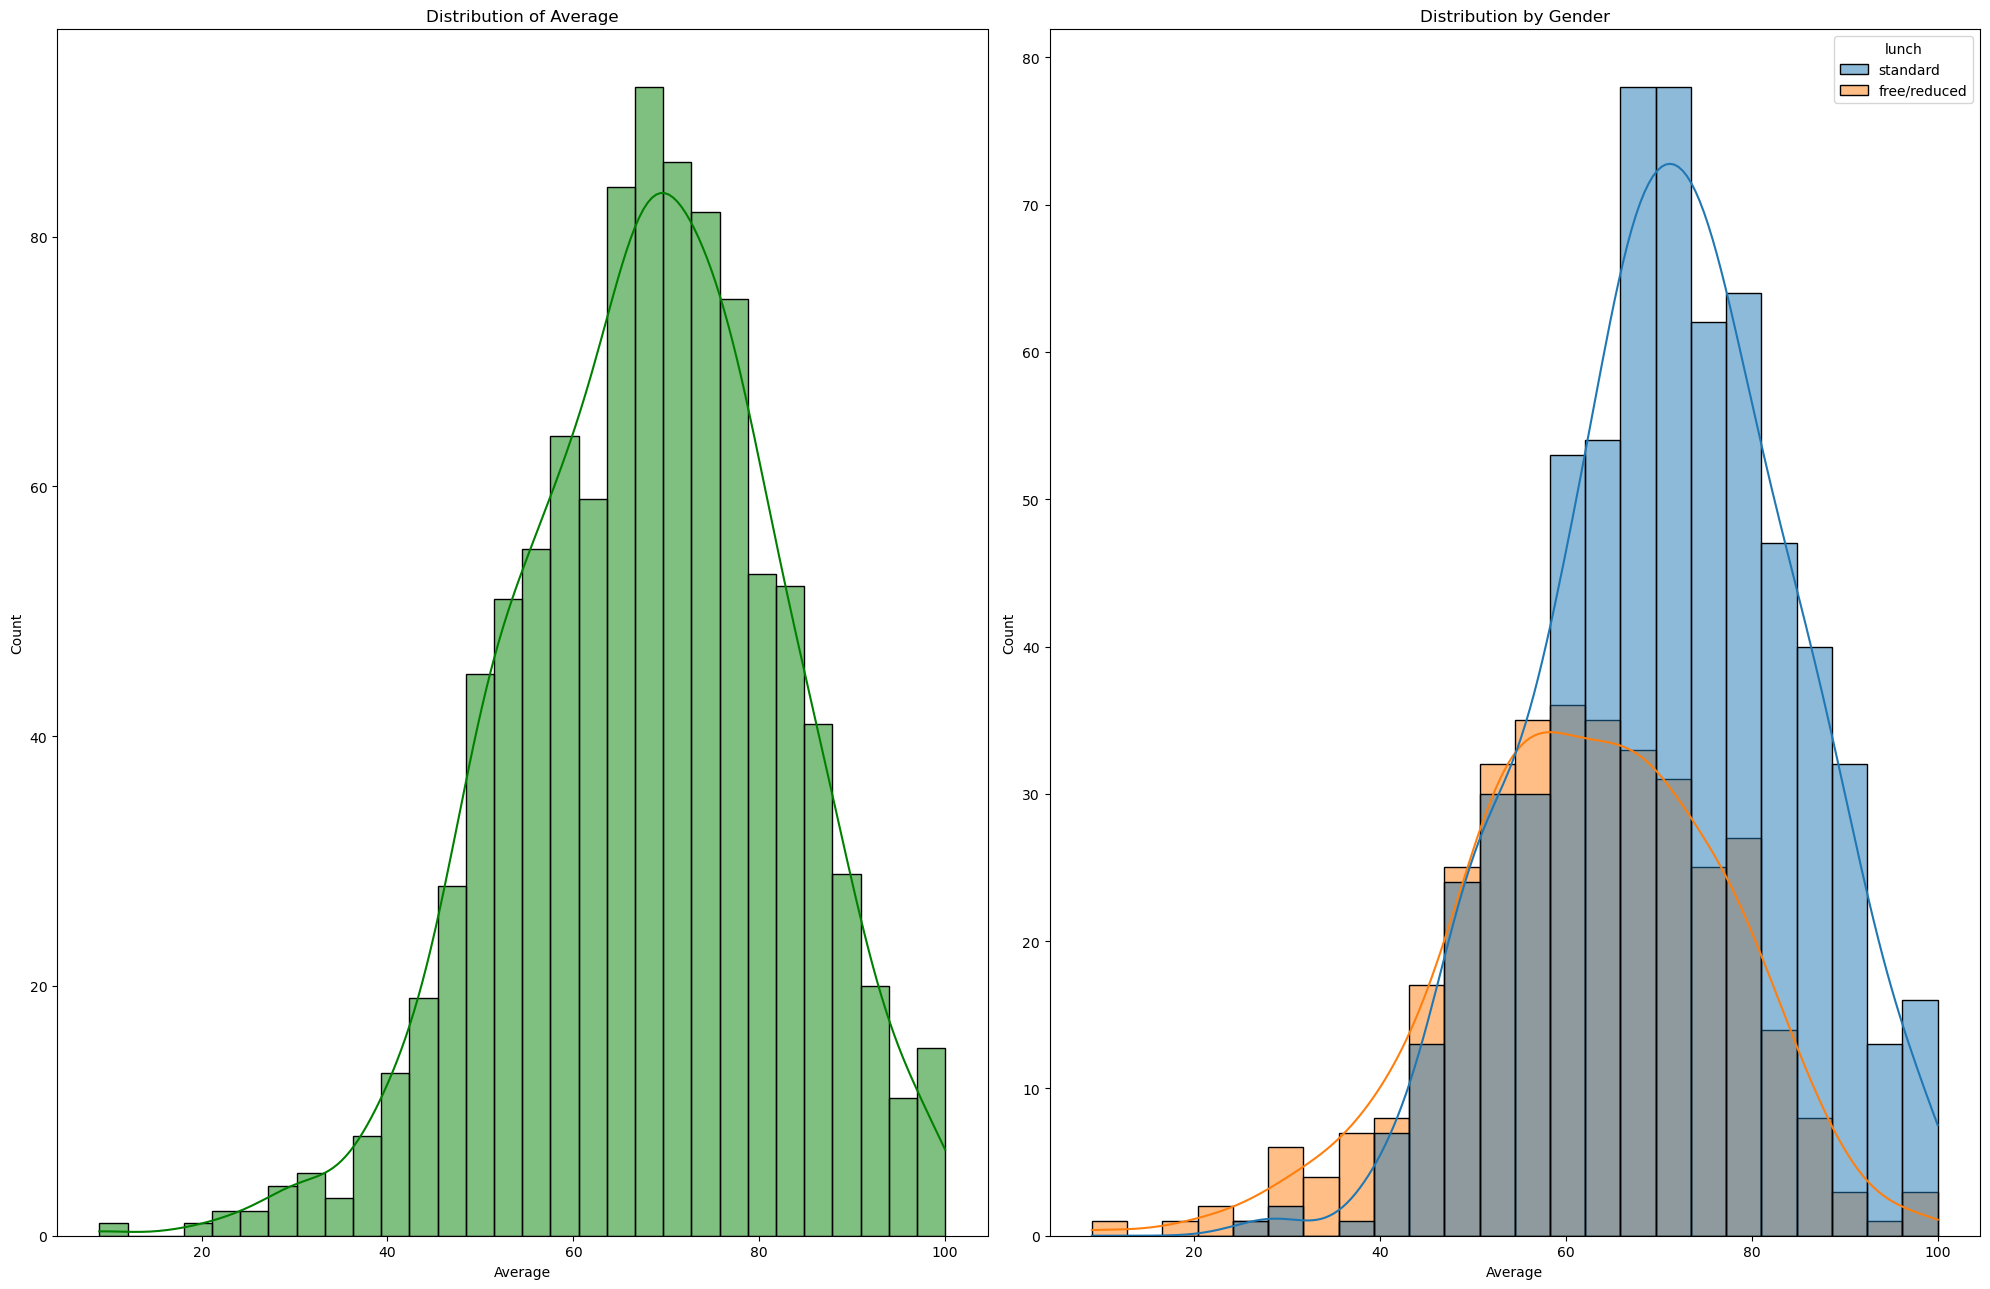

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 13))  # 1 row, 2 columns

# First subplot
sns.histplot(data=df, x="Average", bins=30, kde=True, color="g", ax=axs[0])
axs[0].set_title("Distribution of Average")

# Second subplot
sns.histplot(data=df, x="Average", kde=True, hue="lunch", ax=axs[1])
axs[1].set_title("Distribution by Gender")

plt.tight_layout()
plt.show()


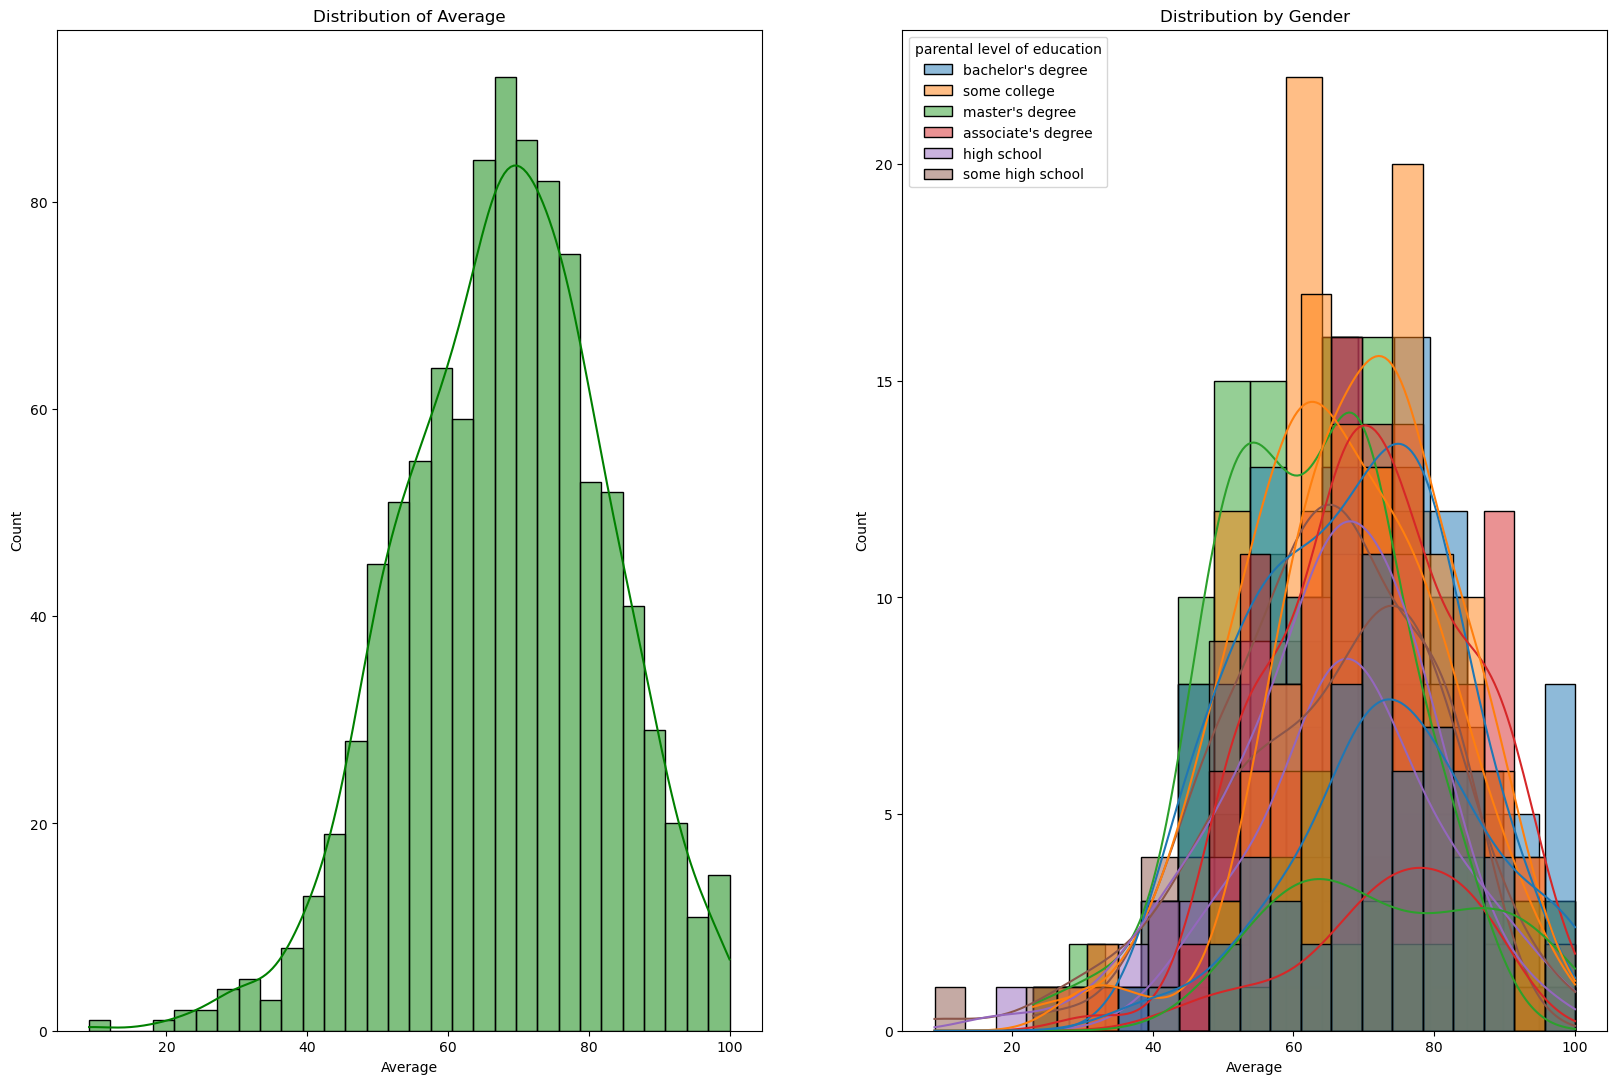

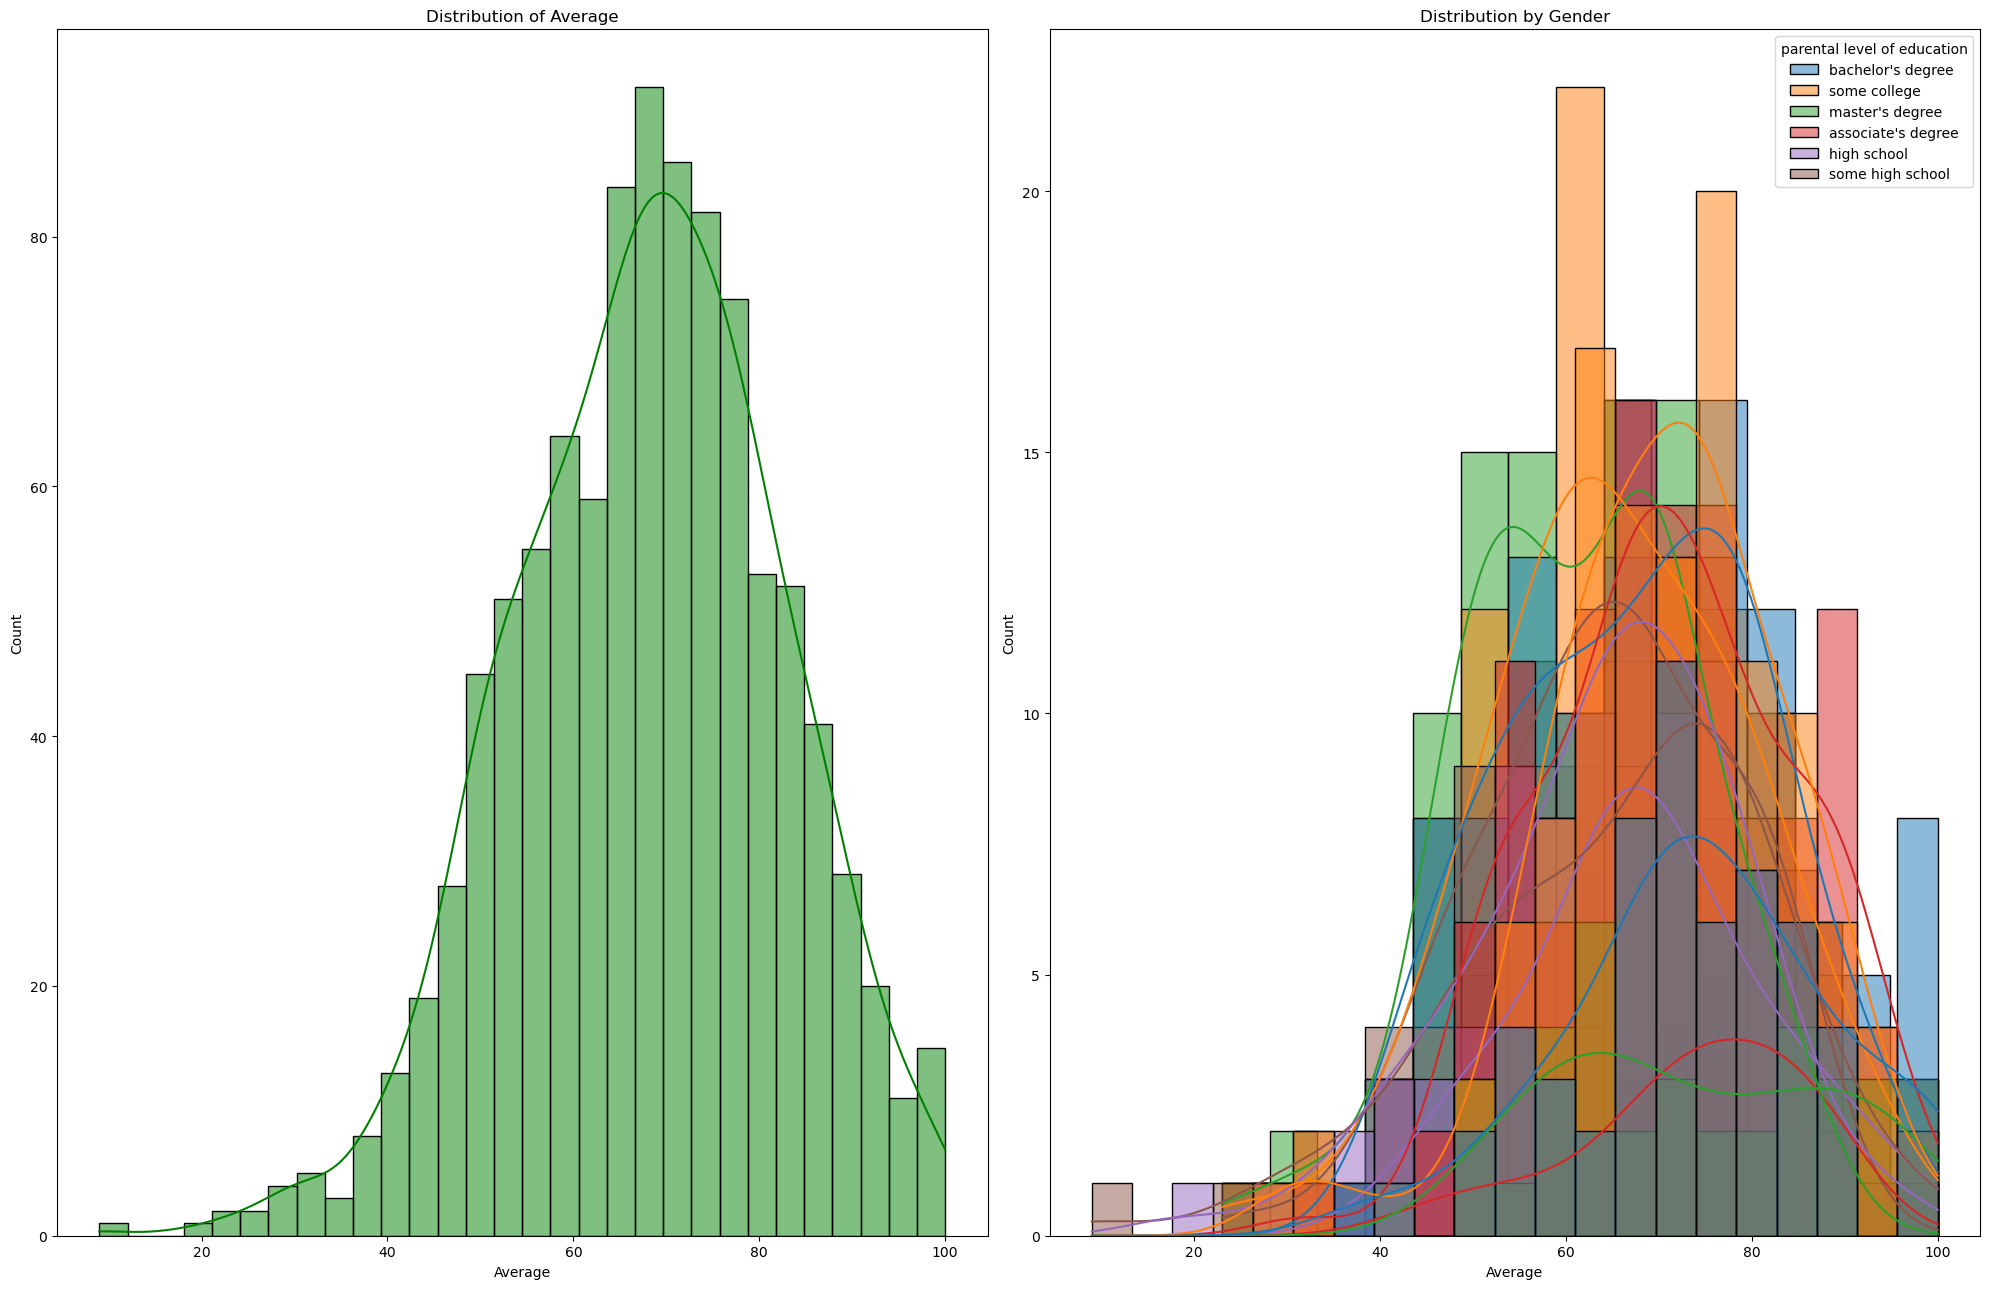

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 13))  # 1 row, 2 columns

# First subplot
sns.histplot(data=df, x="Average", bins=30, kde=True, color="g", ax=axs[0])
axs[0].set_title("Distribution of Average")

# Second subplot
sns.histplot(data=df[df["gender"] == "male"], x="Average", kde=True, hue="parental level of education", ax=axs[1])
axs[1].set_title("Distribution by Gender")

sns.histplot(data=df[df["gender"] == "female"], x= "Average", kde=True, hue="parental level of education", ax=axs[1])
axs[1].set_title("Distribution by Gender")

plt.tight_layout()
plt.show()
